In [9]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="cxjLhbUfr2aRuURbhoj1")
project = rf.workspace("wasteclassification-3hjye").project("wasteee")
version = project.version(2)
dataset = version.download("yolov11")
                

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to wasteee-2 in yolov11:: 100%|██████████████████████████| 8/8 [00:00<00:00, 200.75it/s]


In [2]:
!pip install ultralytics

You should consider upgrading via the 'C:\Users\supha\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [5]:
a = ['train', 'valid', 'test']
for i in a:
    s = f"C:/Users/supha/{i}/1"
    print(s)

C://Users/supha/train/1
C://Users/supha/valid/1
C://Users/supha/test/1


In [16]:
from ultralytics import SAM
import matplotlib.pyplot as plt
import numpy as np
import cv2
import random
import os
import torch
import random
import shutil




In [17]:
model = SAM("sam2_l.pt").to('cuda')


In [18]:
model.info()

Model summary: 854 layers, 224,430,130 parameters, 224,430,130 gradients


(854, 224430130, 224430130, 0.0)

In [19]:
root_data = "C:/Users/supha/Documents/65011048/waste-segmentation/root_data"
classes_data = "C:/Users/supha/Documents/65011048/waste-segmentation/root_data/classes"

In [20]:
tasks = ['train', 'valid', 'test']

In [21]:
print(os.getcwd())

C:\Users\supha\Documents\65011048\waste-segmentation


In [40]:
for one_class in os.listdir(classes_data):
    if int(one_class) > 1:
        break
    for task in tasks:
        image_folder_path = f"{classes_data}/{one_class}/{task}/images"
        txt_folder_path = f"{classes_data}/{one_class}/{task}/labels"
        filtered_clean_data_image_folder_path = f"{classes_data}/{one_class}/filtered_clean_data/images"
        filtered_clean_data_txt_folder_path = f"{classes_data}/{one_class}/filtered_clean_data/labels"
        image_files = sorted(os.listdir(image_folder_path))
        txt_files = sorted(os.listdir(txt_folder_path))

        print(txt_folder_path)

        count = 0
        count_defect = 0
        
        for index_file, (image_file, txt_file) in enumerate(zip(image_files, txt_files)):
            
            # print(txt_file)
            image_path = os.path.join(image_folder_path, image_file)
            txt_path = os.path.join(txt_folder_path, txt_file)

            with open(txt_path, "r") as f:
                lines = f.readlines()
        
            
        
            
        
            if not lines:
                print(f"File {txt_file} is empty. Skipping...")
                count_defect = count_defect + 1
                
            else:
                
        
                
        
        
                with open(f'{filtered_clean_data_image_folder_path}/{one_class}_filtered_clean_data_{count + 1}.jpg', 'wb') as f_wing:
                    
                    from PIL import Image
                    image = Image.open(image_path)
                    image.save(f_wing)
        
                with open(f'{filtered_clean_data_txt_folder_path}/{one_class}_filtered_clean_data_{count + 1}.txt', 'w') as f_wtxt:
                    
                    for line in lines:
                        f_wtxt.write(line)
        
                count = count + 1
            

            

C:/Users/supha/Documents/65011048/waste-segmentation/root_data/classes/0/train/labels
C:/Users/supha/Documents/65011048/waste-segmentation/root_data/classes/0/valid/labels
C:/Users/supha/Documents/65011048/waste-segmentation/root_data/classes/0/test/labels
C:/Users/supha/Documents/65011048/waste-segmentation/root_data/classes/1/train/labels
File 4PCS-AAA-1-5V-740mah-USB-Rechargeable-AAA-Lipo-Battery-li-polymer-lithium-li-ion-battery_jpg.rf.6e4a6a6e4e3b5501224d8d79b2d3d207.txt is empty. Skipping...
File 8906488_jpg.rf.0a7656b510c5e4f6544755a60c04b244.txt is empty. Skipping...
File 8906488_jpg.rf.9f5b20e727fb0923f77481080b24ec17.txt is empty. Skipping...
File IMG_20230829_201337492_jpg.rf.0e90c56fe897a368f5448be5f228f092.txt is empty. Skipping...
File Kayit_2022_02_08_21_32_52_561_mp4-19_jpg.rf.3ea42de2a54dc124174454e537854f11.txt is empty. Skipping...
File Kayit_2022_02_08_21_32_52_561_mp4-19_jpg.rf.aef2e3f6623132c6ec7eb72e8fc28400.txt is empty. Skipping...
File Kayit_2022_02_08_21_32_5

In [53]:
for one_class in os.listdir(classes_data):
    if int(one_class) > 1:
        break
    
    image_folder_path = f"{classes_data}/{one_class}/filtered_clean_data/images"
    txt_folder_path = f"{classes_data}/{one_class}/filtered_clean_data/labels"
    filtered_class_data_image_folder_path = f"{classes_data}/{one_class}/filtered_class_data/images"
    filtered_class_data_txt_folder_path = f"{classes_data}/{one_class}/filtered_class_data/labels"
    image_files = sorted(os.listdir(image_folder_path), key=lambda x: int(x.split("_")[4].split(".")[0]))
    txt_files = sorted(os.listdir(txt_folder_path), key=lambda x: int(x.split("_")[4].split(".")[0]))
    
    
        
    for index_file, (image_file, txt_file) in enumerate(zip(image_files, txt_files)):

        print(txt_file)
        image_path = os.path.join(image_folder_path, image_file)
        txt_path = os.path.join(txt_folder_path, txt_file)

        with open(f'{filtered_class_data_image_folder_path}/{one_class}_filtered_class_data_{index_file + 1}.jpg', 'wb') as f_wing:
                    
            from PIL import Image
            image = Image.open(image_path)
            image.save(f_wing)

        with open(txt_path, "r") as f_read:
            read = f_read.read()

            result_almost = []
            for index_line, line in enumerate(read.split("\n")):
                arr_line = line.split(" ")
                
                arr_line[0] = f"{one_class}"
                
                
            
                # print(" ".join(arr_line))
                result_almost.append(" ".join(arr_line))
            
            result = "\n".join(result_almost)
            
            
            
        
            with open(f'{filtered_class_data_txt_folder_path}/{one_class}_filtered_class_data_{index_file + 1}.txt', 'w') as f_wtxt:
                f_wtxt.write(result)
        

0_filtered_clean_data_1.txt
0_filtered_clean_data_2.txt
0_filtered_clean_data_3.txt
0_filtered_clean_data_4.txt
0_filtered_clean_data_5.txt
0_filtered_clean_data_6.txt
0_filtered_clean_data_7.txt
0_filtered_clean_data_8.txt
0_filtered_clean_data_9.txt
0_filtered_clean_data_10.txt
0_filtered_clean_data_11.txt
0_filtered_clean_data_12.txt
0_filtered_clean_data_13.txt
0_filtered_clean_data_14.txt
0_filtered_clean_data_15.txt
0_filtered_clean_data_16.txt
0_filtered_clean_data_17.txt
0_filtered_clean_data_18.txt
0_filtered_clean_data_19.txt
0_filtered_clean_data_20.txt
0_filtered_clean_data_21.txt
0_filtered_clean_data_22.txt
0_filtered_clean_data_23.txt
0_filtered_clean_data_24.txt
0_filtered_clean_data_25.txt
0_filtered_clean_data_26.txt
0_filtered_clean_data_27.txt
0_filtered_clean_data_28.txt
0_filtered_clean_data_29.txt
0_filtered_clean_data_30.txt
0_filtered_clean_data_31.txt
0_filtered_clean_data_32.txt
0_filtered_clean_data_33.txt
0_filtered_clean_data_34.txt
0_filtered_clean_data_3

In [22]:
color_test = [
    {
        'id': '0',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '1',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '2',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '3',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '4',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '5',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '6',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '7',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '8',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    },
    {
        'id': '9',
        'color': [random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)]
    }
]
print(color_test)

[{'id': '0', 'color': [18, 198, 229]}, {'id': '1', 'color': [229, 124, 2]}, {'id': '2', 'color': [44, 119, 216]}, {'id': '3', 'color': [104, 88, 9]}, {'id': '4', 'color': [94, 74, 77]}, {'id': '5', 'color': [3, 119, 56]}, {'id': '6', 'color': [228, 173, 73]}, {'id': '7', 'color': [38, 253, 195]}, {'id': '8', 'color': [17, 10, 149]}, {'id': '9', 'color': [98, 88, 9]}]


In [23]:
for one_class in os.listdir(classes_data):
    if int(one_class) > 1:
        break
    
    image_folder_path = f"{classes_data}/{one_class}/filtered_class_data/images"
    txt_folder_path = f"{classes_data}/{one_class}/filtered_class_data/labels"
    segmented_data_image_folder_path = f"{classes_data}/{one_class}/segmented_data/images"
    segmented_data_txt_folder_path = f"{classes_data}/{one_class}/segmented_data/labels"
    image_files = sorted(os.listdir(image_folder_path), key=lambda x: int(x.split("_")[4].split(".")[0]))
    txt_files = sorted(os.listdir(txt_folder_path), key=lambda x: int(x.split("_")[4].split(".")[0]))
    
    
        
    all_results = []
    all_masks = []
    all_contours = []
    
    for index_file, (image_file, txt_file) in enumerate(zip(image_files, txt_files)):
    
    
        
        
        image_path = os.path.join(image_folder_path, image_file)
        txt_path = os.path.join(txt_folder_path, txt_file)
    
        
        with open(txt_path, "r") as f:
            lines = f.readlines()
    
        
    
        clean_lines = [line.strip() for line in lines]
    
        print(clean_lines)
        
        
        bbox_list = []
        points_list = []
        classes_list = []
        for i, object in enumerate(clean_lines):
           
            
           
            
            data_float = [float(inx) if idx != 0 else inx for idx, inx in enumerate(object.split(" "))]
        
            
        
            
        
            class_id, center_x, center_y, width, height = data_float
            xmin = center_x - (width / 2)
            ymin = center_y - (height / 2)
            xmax = center_x + (width / 2)
            ymax = center_y + (height / 2)
        
        
            bbox_result = [xmin, ymin, xmax, ymax]
            points_result = [center_x, center_y]
        
            
            bbox_list.append(bbox_result)
            points_list.append(points_result)
            classes_list.append(class_id)
        
        
        
        image = cv2.imread(image_path)
        image_height, image_width = image.shape[:2] 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  
    
        print(image_height, image_width)
        
        
        absolute_bbox_list = [
            [
                int(bbox[0] * image_width),  # xmin
                int(bbox[1] * image_height), # ymin
                int(bbox[2] * image_width),  # xmax
                int(bbox[3] * image_height)  # ymax
            ]
            for bbox in bbox_list
        ]
        
        
        absolute_points_list = [
            [
                int(point[0] * image_width),  # x
                int(point[1] * image_height)  # y
            ]
            for point in points_list
        ]
    
        # print("abs bbox list:", absolute_bbox_list)
        # print("abs points list:", absolute_points_list)
    
        # print("Absolute BBox List:", absolute_bbox_list)
        # print("txt_file:", txt_file)
    
        
    
    
    
        
        results = model(image_path, bboxes=absolute_bbox_list)
    
        all_results.append(results)
    
    
        colors = []
        for class_one in classes_list:
            colors.append(color_test[int(class_one)]['color'])
    
        
        # if hasattr(results, '__iter__') and not isinstance(results, str):
        #     result = results[0]  
        # else:
        #     result = results
    
        result = results[0]
        
        image = result.orig_img.copy()  
        
        
        if hasattr(result, 'boxes') and result.boxes is not None:
            for box in result.boxes.xyxy:
                xmin, ymin, xmax, ymax = map(int, box)
                cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        
       
        if hasattr(result, 'masks') and result.masks is not None:
            masks = result.masks.data.cpu().numpy()  
            num_masks = masks.shape[0]
    
            all_masks.append(masks)
        
            
        
            all_lines_result = []
            
            for i, (mask, line) in enumerate(zip(masks, clean_lines)):
                color = colors[i] 
                mask = (mask > 0.5).astype(np.uint8)  
        
                
                contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
                
    
                
                all_x_y = []
    
                
                    
                    
                
                for point in contours[0]:
                    point = point[0]
                    
                    print(point)
                    x, y = point
                    x = str((x / image_width) * 1.0)
                    y = str((y / image_height) * 1.0)
    
                    
                    all_x_y.append(x)
                    all_x_y.append(y)
                    
                
                all_x_y_result = " ".join(all_x_y)
                
                all_lines = line.split(" ")[0] + " " + all_x_y_result
                all_lines_result.append(all_lines)
                
                # print(all_lines)
    
                
                    
                
                
                for contour in contours:
                    cv2.drawContours(image, [contour], -1, color, thickness=5, lineType=cv2.LINE_8)  
    
            with open(f'{segmented_data_txt_folder_path}/{one_class}_segmented_data_{index_file + 1}.txt', 'w') as f_wtxt:
                    
                f_wtxt.write("\n".join(all_lines_result))
            # print("result:", result_contours)
            print("result:", "\n".join(all_lines_result))


        with open(f'{segmented_data_image_folder_path}/{one_class}_segmented_data_{index_file + 1}.jpg', 'wb') as f_wing:
                    
            from PIL import Image
            image = Image.open(image_path)
            image.save(f_wing)

        

        
        # cv2.imwrite(f'{segmented_data_image_folder_path}/{one_class}_segmented_data_{index_file + 1}.jpg', image)
        
        
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  
        plt.axis('off')
        plt.show()



['0 0.4811666666666667 0.481875 0.4044583333333333 0.5308333333333334']
240 240



C:\Users\supha\AppData\Local\Programs\Python\Python310\lib\site-packages\ultralytics\models\sam\modules\blocks.py:569: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:555.)
  x = F.scaled_dot_product_attention(


image 1/1 C:\Users\supha\Documents\65011048\waste-segmentation\root_data\classes\0\filtered_class_data\images\0_filtered_class_data_1.jpg: 1024x1024 1 0, 63678.3ms
Speed: 1020.6ms preprocess, 63678.3ms inference, 251.8ms postprocess per image at shape (1, 3, 1024, 1024)
[69 76]
[70 76]
[72 78]
[71 79]
[67 79]
[66 78]
[66 79]
[67 79]
[68 80]
[70 80]
[73 83]
[76 83]
[77 82]
[77 80]
[76 79]
[75 79]
[73 77]
[72 78]
[71 77]
[71 76]
result: 0 0.2875 0.31666666666666665 0.2916666666666667 0.31666666666666665 0.3 0.325 0.29583333333333334 0.32916666666666666 0.2791666666666667 0.32916666666666666 0.275 0.325 0.275 0.32916666666666666 0.2791666666666667 0.32916666666666666 0.2833333333333333 0.3333333333333333 0.2916666666666667 0.3333333333333333 0.30416666666666664 0.3458333333333333 0.31666666666666665 0.3458333333333333 0.32083333333333336 0.3416666666666667 0.32083333333333336 0.3333333333333333 0.31666666666666665 0.32916666666666666 0.3125 0.32916666666666666 0.30416666666666664 0.320833

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'


<Figure size 600x600 with 0 Axes>

In [1]:
ratio_tasks = ['ready_train_data', 'ready_valid_data', 'ready_test_data']

In [12]:


for one_class in os.listdir(classes_data):
    if int(one_class) > 1:
        break
    
    image_folder_path = f"{classes_data}/{one_class}/segmented_data/images"
    txt_folder_path = f"{classes_data}/{one_class}/segmented_data/labels"
    # segmented_data_image_folder_path = f"{classes_data}/{one_class}/segmented_data/images"
    # segmented_data_txt_folder_path = f"{classes_data}/{one_class}/segmented_data/labels"
    image_files = sorted(os.listdir(image_folder_path), key=lambda x: int(x.split("_")[3].split(".")[0]))
    txt_files = sorted(os.listdir(txt_folder_path), key=lambda x: int(x.split("_")[3].split(".")[0]))
    
    
    
        
    image_train_num = round(0.6 * len(image_files))
    image_valid_num = round(0.1 * len(image_files))
    image_test_num = len(image_files) - (image_train_num + image_valid_num)
    print("train:", image_train_num)
    print("valid:", image_valid_num)
    print("test:", image_test_num)
    images_train = random.sample(image_files, image_train_num)
    image_remaining_files = list(filter(lambda file: file not in images_train, image_files))
    
    images_valid = random.sample(image_remaining_files, image_valid_num)
    
     
    
    images_test = list(filter(lambda file: file not in images_valid, image_remaining_files))
    print("train:", images_train)
    print("vaild:", images_valid)
    print("test:", images_test)


    def copy_files(files, split):
        for index_file_name, file_name in enumerate(files):
            
            shutil.copy(f"{image_folder_path}/{file_name}", f"{classes_data}/{one_class}/{split}/images/{one_class}_{split}_{index_file_name + 1}.jpg")
            
            
            label_file = file_name.replace('.jpg', '.txt')
            shutil.copy(f"{txt_folder_path}/{label_file}", f"{classes_data}/{one_class}/{split}/labels/{one_class}_{split}_{index_file_name + 1}.txt")
    
    
    copy_files(images_train, 'ready_train_data')
    copy_files(images_valid, 'ready_valid_data')
    copy_files(images_test, 'ready_test_data')
    
    
    
    




    

train: 43
valid: 7
test: 22
train: ['0_segmented_data_13.jpg', '0_segmented_data_66.jpg', '0_segmented_data_38.jpg', '0_segmented_data_36.jpg', '0_segmented_data_64.jpg', '0_segmented_data_45.jpg', '0_segmented_data_16.jpg', '0_segmented_data_11.jpg', '0_segmented_data_21.jpg', '0_segmented_data_35.jpg', '0_segmented_data_70.jpg', '0_segmented_data_22.jpg', '0_segmented_data_23.jpg', '0_segmented_data_27.jpg', '0_segmented_data_2.jpg', '0_segmented_data_32.jpg', '0_segmented_data_42.jpg', '0_segmented_data_25.jpg', '0_segmented_data_10.jpg', '0_segmented_data_9.jpg', '0_segmented_data_24.jpg', '0_segmented_data_55.jpg', '0_segmented_data_3.jpg', '0_segmented_data_31.jpg', '0_segmented_data_61.jpg', '0_segmented_data_63.jpg', '0_segmented_data_54.jpg', '0_segmented_data_14.jpg', '0_segmented_data_71.jpg', '0_segmented_data_20.jpg', '0_segmented_data_7.jpg', '0_segmented_data_60.jpg', '0_segmented_data_65.jpg', '0_segmented_data_5.jpg', '0_segmented_data_59.jpg', '0_segmented_data_18.jpg

In [328]:
num_class = 5
folder_path_data = "C:/Users/suphakrit/Desktop/data_collect"
for inx_c, c in enumerate(sorted(os.listdir(folder_path_data), key=lambda x: int(x.split('.')[0]))):
    # c = str(c)
    print(c, type(c))
    for inx_file, file in enumerate(sorted(os.listdir(f"{folder_path_data}/{c}/labels"), key=lambda x: int(x.split('.')[0]))):
                                    
        # print(file)
        # f_read = open(f"{folder_path_data}/{c}/labels/{file}", "r")

        with open(f"{folder_path_data}/{c}/labels/{file}", "r") as f_read:
            
        


            read = f_read.read()
            # print(read)

            result_almost = []
            for index_line, line in enumerate(read.split("\n")):
                arr_line = line.split(" ")
                # print(arr)
                # if arr_line[0] == "0":
                arr_line[0] = f"{c}"
                # print(arr_line[0])
                # print(arr)
                # print(i)
                
            
                # print(" ".join(arr_line))
                result_almost.append(" ".join(arr_line))
            
            result = "\n".join(result_almost)
            
            print(result)
    
        
            with open(f"{folder_path_data}/{c}/labels/{file}", "w") as f_write:
                f_write.write(result)

        # print(f"{folder_path_data}/{c}/labels/{file}")

            


        
        
        # result_almost = []
        # for index_line, line in enumerate(read.split("\n")):
        #     arr_line = line.split(" ")
        #     # print(arr)
        #     # if arr_line[0] == "0":
        #     arr_line[0] = "1"
        #     # print(arr)
        #     # print(i)
            
        
        #     # print(" ".join(arr_line))
        #     result_almost.append(" ".join(arr_line))
        
        # result = "\n".join(result_almost)
        
        # print(result)
        
        # c_f = ""
        # f_read = open(c_f, "r")
        # read = f_read.read()

        # for index, i in enumerate(read.split("\n")):
        #     arr = i.split(" ")
        #     # print(arr)
        #     if arr[0] == "0":
        #         arr[0] = "1"
        #     # print(arr)
        
        #     print(" ".join(arr))
        

0 <class 'str'>
0 0.50625 0.4984375 0.540625 0.99375 0.2490234375 0.001953125 0.248046875 0.0029296875 0.240234375 0.0029296875 0.2392578125 0.00390625 0.236328125 0.00390625 0.2353515625 0.0048828125 0.2333984375 0.0048828125 0.2255859375 0.0126953125 0.2255859375 0.013671875 0.2216796875 0.017578125 0.2216796875 0.0185546875 0.2177734375 0.0224609375 0.2177734375 0.0234375 0.216796875 0.0244140625 0.216796875 0.025390625 0.2138671875 0.0283203125 0.2119140625 0.0283203125 0.2109375 0.029296875 0.208984375 0.029296875 0.2080078125 0.0302734375 0.2060546875 0.0302734375 0.205078125 0.03125 0.203125 0.03125 0.2021484375 0.0322265625 0.201171875 0.0322265625 0.2001953125 0.033203125 0.1982421875 0.033203125 0.197265625 0.0341796875 0.1953125 0.0341796875 0.1943359375 0.03515625 0.193359375 0.03515625 0.1923828125 0.0361328125 0.1904296875 0.0361328125 0.189453125 0.037109375 0.1875 0.037109375 0.1865234375 0.0380859375 0.185546875 0.0380859375 0.1845703125 0.0390625 0.1826171875 0.039062

In [357]:
import random
# print(random)
print(len(files))
files = sorted(os.listdir(txt_folder_path_filtered), key=lambda x: int(x.split('.')[0]))
train_num = round(0.6 * len(files))
valid_num = round(0.1 * len(files))
test_num = len(files) - (train_num + valid_num)
print("train:", train_num)
print("valid:", valid_num)
print("test:", test_num)
train = random.sample(files, train_num)
remaining_files = list(filter(lambda file: file not in train, files))

valid = random.sample(remaining_files, valid_num)
# remaining_files = filter(lambda file: file not in vaild, remaining_files)
 

test = list(filter(lambda file: file not in valid, remaining_files))
print("train:", train)
print("vaild:", valid)
print("test:", test)

    

398
train: 239
valid: 40
test: 119
train: ['310.txt', '340.txt', '368.txt', '133.txt', '307.txt', '123.txt', '9.txt', '326.txt', '190.txt', '10.txt', '23.txt', '304.txt', '213.txt', '371.txt', '294.txt', '367.txt', '200.txt', '121.txt', '35.txt', '152.txt', '64.txt', '356.txt', '362.txt', '276.txt', '338.txt', '192.txt', '178.txt', '217.txt', '366.txt', '34.txt', '246.txt', '394.txt', '341.txt', '223.txt', '101.txt', '51.txt', '19.txt', '177.txt', '236.txt', '359.txt', '115.txt', '155.txt', '258.txt', '292.txt', '182.txt', '239.txt', '108.txt', '398.txt', '36.txt', '299.txt', '255.txt', '142.txt', '220.txt', '329.txt', '381.txt', '102.txt', '386.txt', '205.txt', '241.txt', '256.txt', '227.txt', '72.txt', '332.txt', '351.txt', '342.txt', '247.txt', '337.txt', '143.txt', '59.txt', '32.txt', '314.txt', '334.txt', '138.txt', '270.txt', '21.txt', '282.txt', '50.txt', '116.txt', '12.txt', '75.txt', '291.txt', '295.txt', '306.txt', '305.txt', '280.txt', '156.txt', '350.txt', '7.txt', '191.txt

In [268]:
f_read = open(r"C:\Users\suphakrit\Desktop\data-seg\10.txt","r")
read = f_read.read()
# print(read)

# for line in read:
#     print(read.replace("0", "1"))
# read2 = read.replace("0", "1")
# print(read2)
result_almost = []
for index_line, line in enumerate(read.split("\n")):
    arr_line = line.split(" ")
    # print(arr)
    # if arr_line[0] == "0":
    arr_line[0] = "1"
    # print(arr)
    # print(i)
    

    # print(" ".join(arr_line))
    result_almost.append(" ".join(arr_line))

result = "\n".join(result_almost)

print(result)

# with open(path, "w") as f_w:
#     f_w.write(result)

    
#     arr = i.split(" ")
# print(arr, type(arr))

1 0.83359375 0.4015625 0.1734375 0.509375 0.5068359375 0.0947265625 0.505859375 0.095703125 0.4990234375 0.095703125 0.498046875 0.0966796875 0.4921875 0.0966796875 0.4912109375 0.09765625 0.48828125 0.09765625 0.4873046875 0.0986328125 0.4853515625 0.0986328125 0.484375 0.099609375 0.482421875 0.099609375 0.4814453125 0.1005859375 0.48046875 0.1005859375 0.4794921875 0.1015625 0.478515625 0.1015625 0.4775390625 0.1025390625 0.4765625 0.1025390625 0.474609375 0.1044921875 0.4736328125 0.1044921875 0.4716796875 0.1064453125 0.4716796875 0.107421875 0.4697265625 0.109375 0.4697265625 0.111328125 0.46875 0.1123046875 0.46875 0.125 0.4697265625 0.1259765625 0.4697265625 0.126953125 0.4736328125 0.130859375 0.474609375 0.130859375 0.482421875 0.138671875 0.482421875 0.1396484375 0.4833984375 0.140625 0.4833984375 0.1416015625 0.484375 0.142578125 0.484375 0.1455078125 0.4853515625 0.146484375 0.4853515625 0.1484375 0.484375 0.1494140625 0.484375 0.16796875 0.4833984375 0.1689453125 0.483398

In [85]:
del str

In [24]:
print(all_contours)

[(array([[[281,  76]],

       [[280,  77]],

       [[274,  77]],

       [[273,  78]],

       [[269,  78]],

       [[268,  79]],

       [[267,  79]],

       [[266,  80]],

       [[263,  80]],

       [[261,  82]],

       [[260,  82]],

       [[258,  84]],

       [[258,  85]],

       [[257,  86]],

       [[257,  87]],

       [[256,  88]],

       [[256,  89]],

       [[255,  90]],

       [[255,  92]],

       [[254,  93]],

       [[254,  95]],

       [[253,  96]],

       [[250,  96]],

       [[249,  97]],

       [[248,  97]],

       [[247,  98]],

       [[246,  98]],

       [[245,  99]],

       [[244,  99]],

       [[243, 100]],

       [[242, 100]],

       [[241, 101]],

       [[240, 101]],

       [[239, 102]],

       [[238, 102]],

       [[237, 103]],

       [[236, 103]],

       [[235, 104]],

       [[234, 104]],

       [[233, 105]],

       [[232, 105]],

       [[231, 106]],

       [[230, 106]],

       [[229, 107]],

       [[228, 107]],

       [

In [22]:
print(all_masks)

[array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]), array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, 

In [13]:
print(all_results)

[[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: ultralytics.engine.results.Masks object
names: {0: '0'}
obb: None
orig_img: array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
      

In [20]:
print(results.masks.ultralytics.engine.results.Masks)

AttributeError: 'list' object has no attribute 'masks'

NameError: name 'result' is not defined

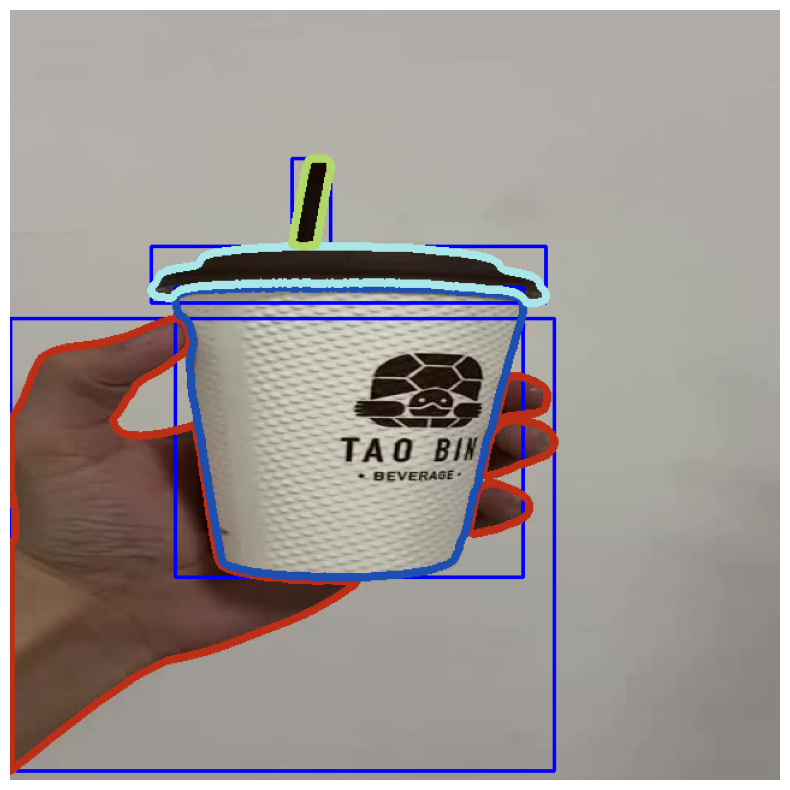

In [195]:
# import matplotlib.pyplot as plt
# import numpy as np
# import cv2

# # ตรวจสอบว่า results เป็น list หรือเป็นออบเจ็กต์ `Results`
# if hasattr(results, '__iter__') and not isinstance(results, str):
#     result = results[0]  # เข้าถึงผลลัพธ์แรก (ถ้ามีหลายผลลัพธ์ในลิสต์)
# else:
#     result = results

# # โหลดภาพต้นฉบับจาก result
# image = result.orig_img

# # วาด bounding boxes
# if hasattr(result, 'boxes') and result.boxes is not None:
#     for box in result.boxes.xyxy:
#         xmin, ymin, xmax, ymax = map(int, box)
#         cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # วาดกรอบสี่เหลี่ยมสีฟ้า

# # วาด segmentation masks (ถ้ามี)
# if hasattr(result, 'masks') and result.masks is not None:
#     masks = result.masks.data.cpu().numpy()  # แปลง mask เป็น numpy array
#     for mask in masks:
#         image[mask > 0.5] = [0, 255, 0]  # วาด mask สีเขียวบนตำแหน่งที่มีค่าเป็น 1

# # แสดงภาพด้วย matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(image)
# plt.axis('off')
# plt.show()


# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# import random

# # ตรวจสอบว่า results เป็น list หรือเป็นออบเจ็กต์ `Results`
# if hasattr(results, '__iter__') and not isinstance(results, str):
#     result = results[0]  # เข้าถึงผลลัพธ์แรก (ถ้ามีหลายผลลัพธ์ในลิสต์)
# else:
#     result = results

# # โหลดภาพต้นฉบับจาก result
# image = result.orig_img

# # วาด bounding boxes
# if hasattr(result, 'boxes') and result.boxes is not None:
#     for box in result.boxes.xyxy:
#         xmin, ymin, xmax, ymax = map(int, box)
#         cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)  # วาดกรอบสี่เหลี่ยมสีแดง

# # วาด segmentation masks (ถ้ามี) โดยใช้สีที่ต่างกันสำหรับแต่ละคลาส
# if hasattr(result, 'masks') and result.masks is not None:
#     masks = result.masks.data.cpu().numpy()  # แปลง mask เป็น numpy array
#     num_masks = masks.shape[0]

#     # สร้างลิสต์ของสีสำหรับแต่ละคลาส
#     colors = []
#     for _ in range(num_masks):
#         colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

#     # วาด mask ด้วยสีที่ต่างกันสำหรับแต่ละคลาส
#     for i, mask in enumerate(masks):
#         color = colors[i]
#         image[mask > 0.5] = color  # วาด mask ด้วยสีที่สุ่มที่ได้

# # แสดงภาพด้วย matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(image)
# plt.axis('off')
# plt.show()


# import matplotlib.pyplot as plt
# import numpy as np
# import cv2
# import random

# # ตรวจสอบว่า results เป็น list หรือเป็นออบเจ็กต์ `Results`
# if hasattr(results, '__iter__') and not isinstance(results, str):
#     result = results[0]  # เข้าถึงผลลัพธ์แรก (ถ้ามีหลายผลลัพธ์ในลิสต์)
# else:
#     result = results

# # โหลดภาพต้นฉบับจาก result
# image = result.orig_img.copy()  # ใช้ .copy() เพื่อไม่ให้แก้ไขภาพต้นฉบับโดยตรง

# # วาด bounding boxes
# if hasattr(result, 'boxes') and result.boxes is not None:
#     for box in result.boxes.xyxy:
#         xmin, ymin, xmax, ymax = map(int, box)
#         cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0, 0, 255), 2)  # วาดกรอบสี่เหลี่ยมสีแดง

# # วาดเฉพาะขอบของ segmentation masks (ถ้ามี) โดยใช้สีที่ต่างกันสำหรับแต่ละคลาส
# if hasattr(result, 'masks') and result.masks is not None:
#     masks = result.masks.data.cpu().numpy()  # แปลง mask เป็น numpy array
#     num_masks = masks.shape[0]

#     # สร้างลิสต์ของสีสำหรับแต่ละคลาส
#     colors = []
#     for _ in range(num_masks):
#         colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

#     # วาดเฉพาะขอบของ mask ด้วยสีที่ต่างกันสำหรับแต่ละคลาส
#     for i, mask in enumerate(masks):
#         color = colors[i]
#         mask = (mask > 0.5).astype(np.uint8)  # แปลง mask เป็น binary (0 และ 1)
#         contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#         cv2.drawContours(image, contours, -1, color, 2)  # วาดขอบ (ความหนา 2)

# # แสดงภาพด้วย matplotlib
# plt.figure(figsize=(10, 10))
# plt.imshow(image)
# plt.axis('off')
# plt.show()









if hasattr(results, '__iter__') and not isinstance(results, str):
    result = results[0]  # เข้าถึงผลลัพธ์แรก (ถ้ามีหลายผลลัพธ์ในลิสต์)
else:
    result = results


image = result.orig_img.copy()  # ใช้ .copy() เพื่อไม่ให้แก้ไขภาพต้นฉบับโดยตรง


if hasattr(result, 'boxes') and result.boxes is not None:
    for box in result.boxes.xyxy:
        xmin, ymin, xmax, ymax = map(int, box)
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)  # วาดกรอบสี่เหลี่ยมสีแดง


if hasattr(result, 'masks') and result.masks is not None:
    masks = result.masks.data.cpu().numpy()  # แปลง mask เป็น numpy array
    num_masks = masks.shape[0]

    
    colors = []
    for _ in range(num_masks):
        colors.append([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])

    
    for i, mask in enumerate(masks):
        color = [int(c) for c in colors[i]]  # ทำให้เป็น int เพื่อให้เข้ากันกับ OpenCV
        mask = (mask > 0.5).astype(np.uint8)  # แปลง mask เป็น binary (0 และ 1)

        
        contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        
        for contour in contours:
            cv2.drawContours(image, [contour], -1, color, thickness=5, lineType=cv2.LINE_8)  # วาดแค่ขอบของ mask


plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # เปลี่ยนสี BGR เป็น RGB เพื่อแสดงผลถูกต้องใน matplotlib
plt.axis('off')
plt.show()











